# Подключение основных библиотек

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Геренация исходных сигналов

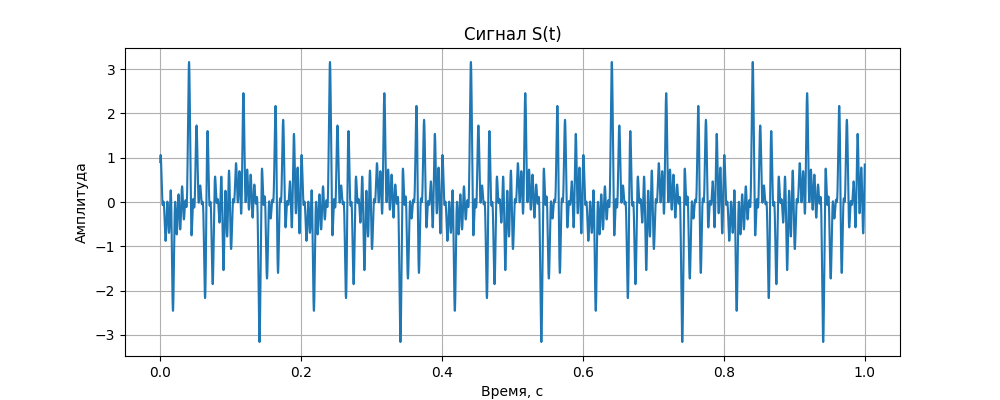

In [ ]:

A = np.array([2, 1.5, 0.7, 1])
omega = np.array([45, 60, 90, 20]) 
phi = np.array([40, -80, 120, 0]) 

fs = 1000    
T = 1        
t = np.linspace(0, T, int(fs*T), endpoint=False)

signals = [A[i] * np.sin(2 * np.pi * omega[i] * t + phi[i]) for i in range(4)]
S1, S2, S3, S4 = signals
S = S1 * S3 * (S2 + S4)

plt.figure(figsize=(10,4))
plt.plot(t, S)
plt.title("Сигнал S(t)")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()


# Спектр исходного сигнала

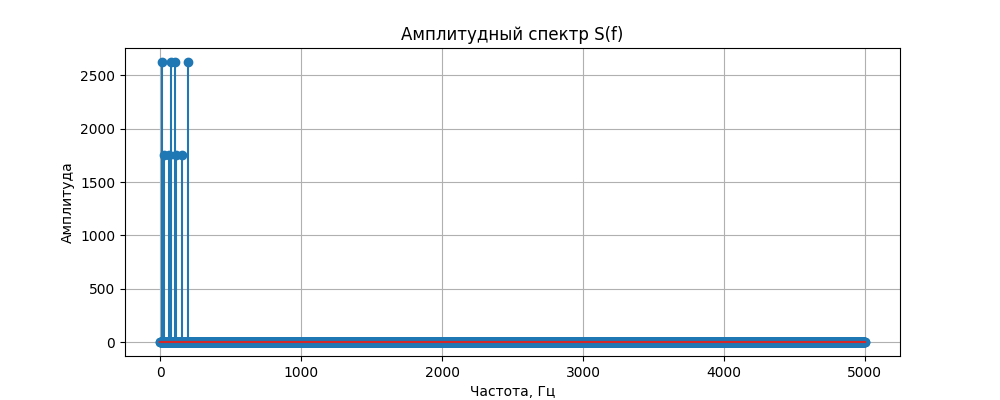

Основные гармоники (Гц): [ 15.  25.  65.  75. 105. 115. 155. 195.]


In [3]:
N = len(S)
S_fft = np.fft.fft(S)
freqs = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10,4))
plt.stem(freqs[:N//2], np.abs(S_fft)[:N//2])  # use_line_collection убран
plt.title("Амплитудный спектр S(f)")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

peaks, _ = find_peaks(np.abs(S_fft)[:N//2], height=0.1)
peak_freqs = freqs[peaks]
print("Основные гармоники (Гц):", peak_freqs)


# Разложение сигнала на гармоники

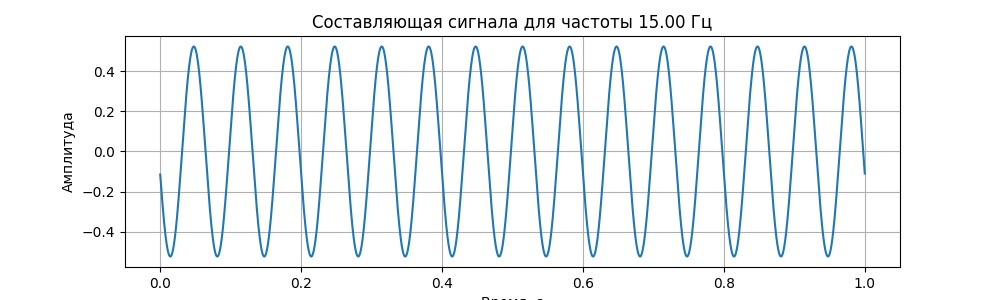

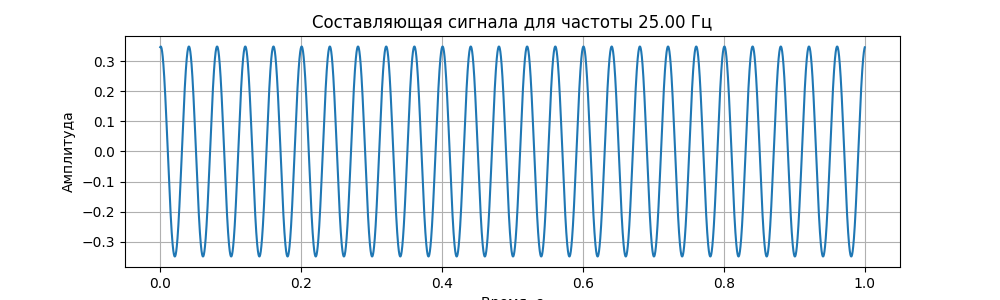

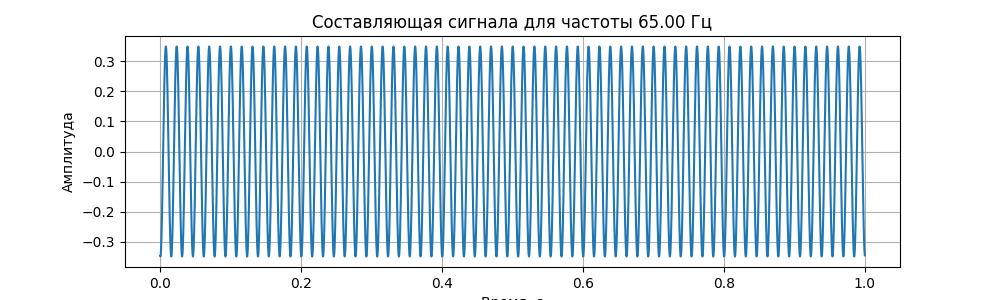

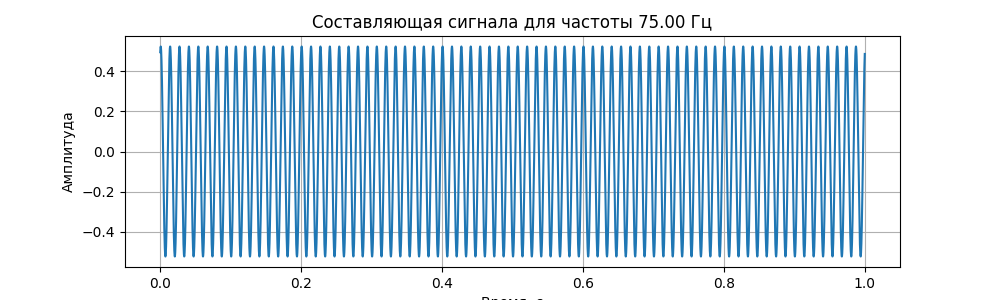

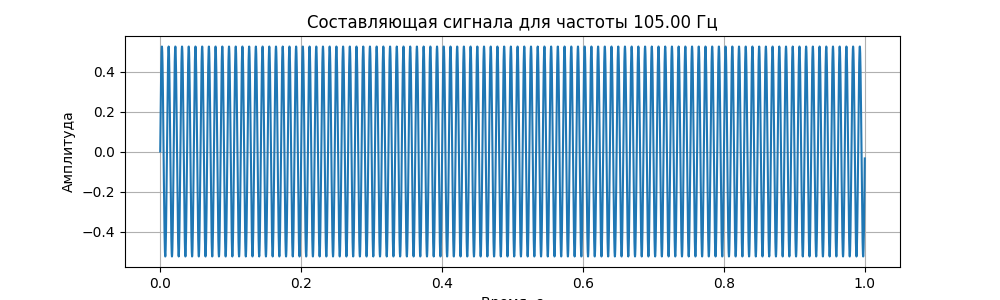

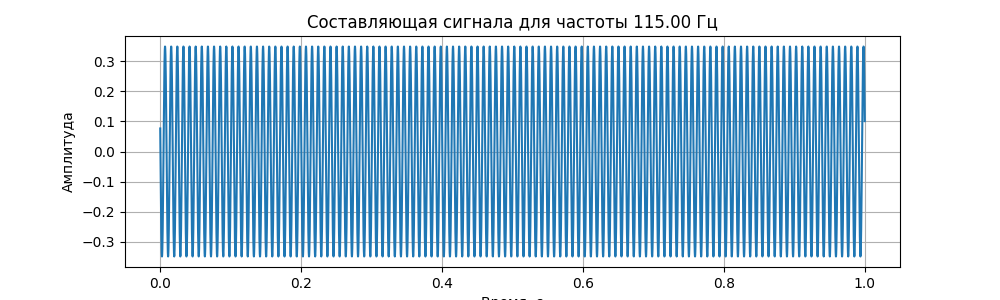

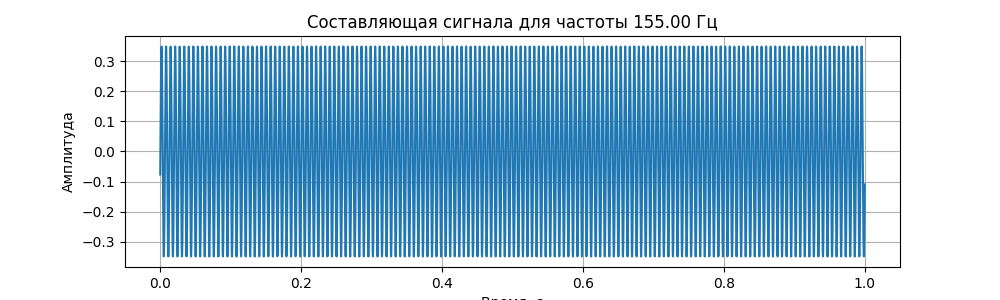

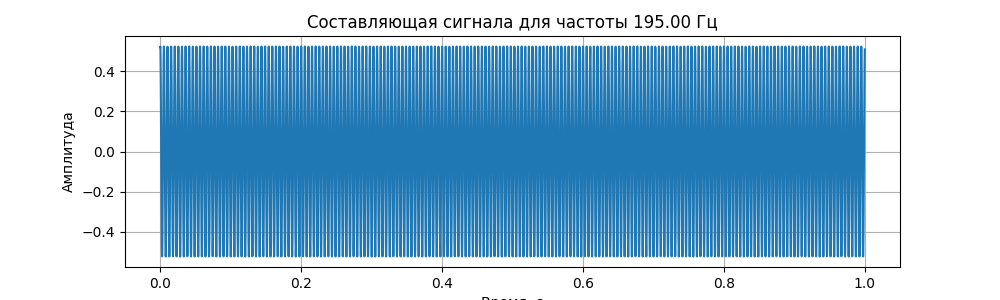

In [4]:
harmonics = []
for pf in peak_freqs:
    S_fft_filtered = np.zeros_like(S_fft)
    S_fft_filtered[np.abs(freqs - pf) < 1] = S_fft[np.abs(freqs - pf) < 1]
    S_fft_filtered[np.abs(freqs + pf) < 1] = S_fft[np.abs(freqs + pf) < 1]
    filtered_signal = np.fft.ifft(S_fft_filtered).real
    harmonics.append(filtered_signal)
    
    plt.figure(figsize=(10,3))
    plt.plot(t, filtered_signal)
    plt.title(f"Составляющая сигнала для частоты {pf:.2f} Гц")
    plt.xlabel("Время, с")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.show()

# Полосовая фильтрация с помощью фильтра Баттерворта

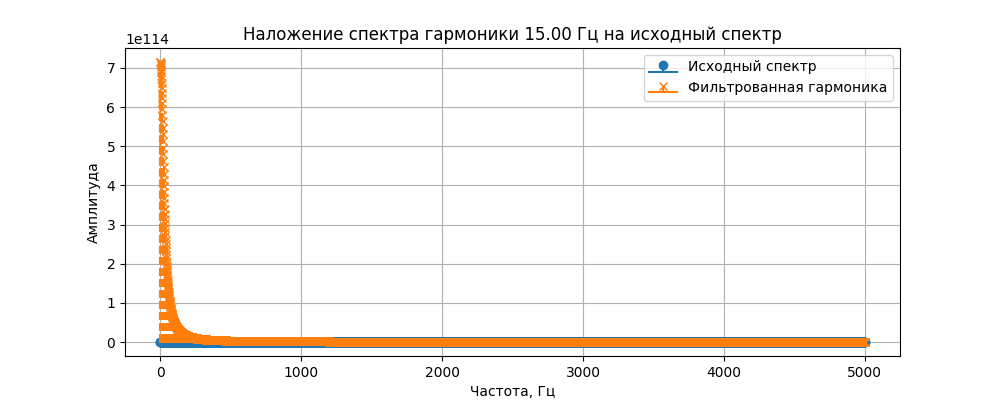

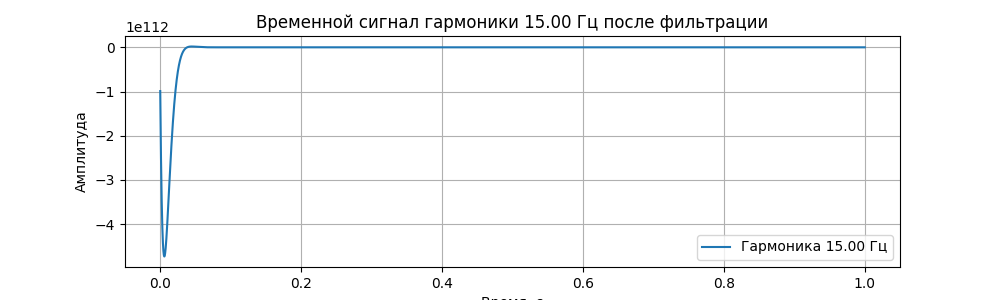

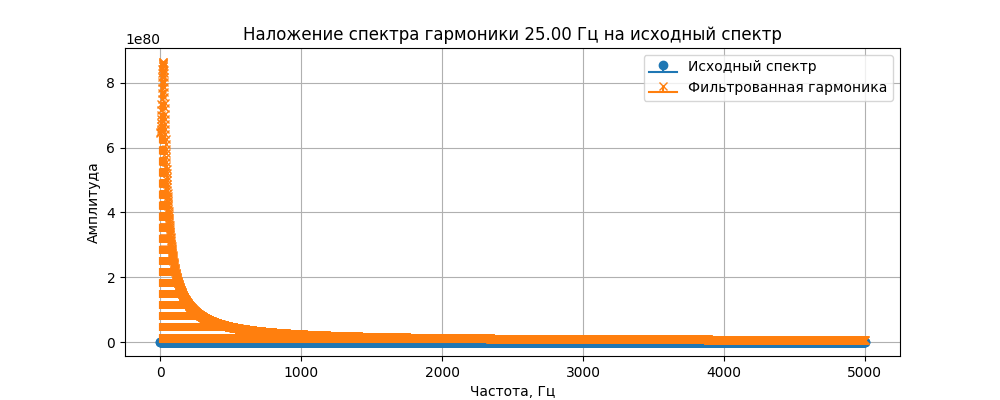

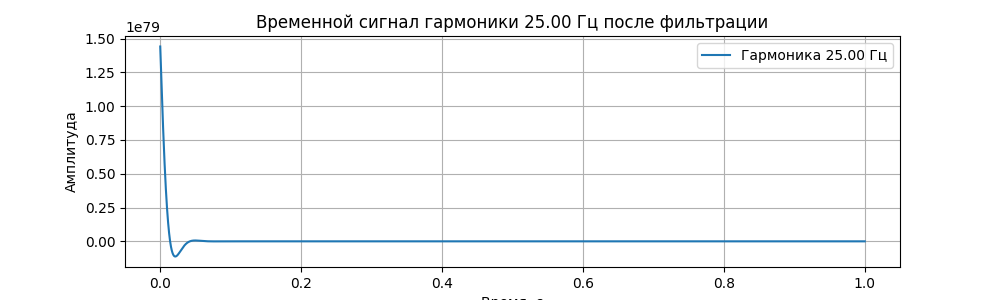

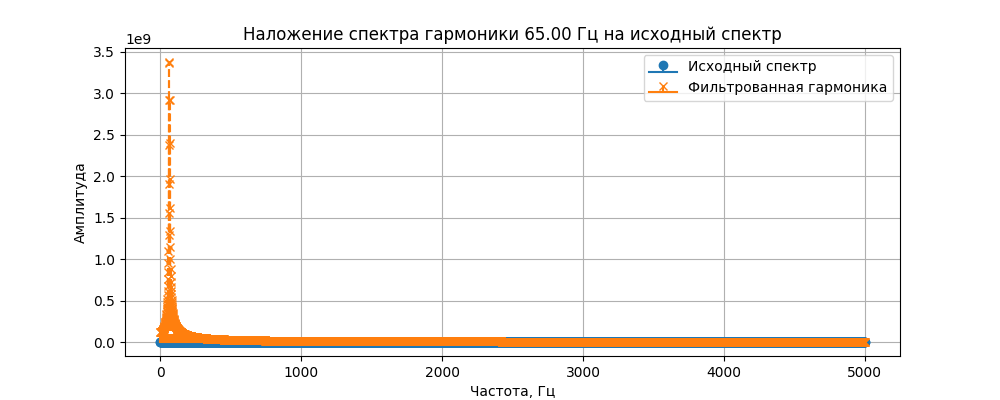

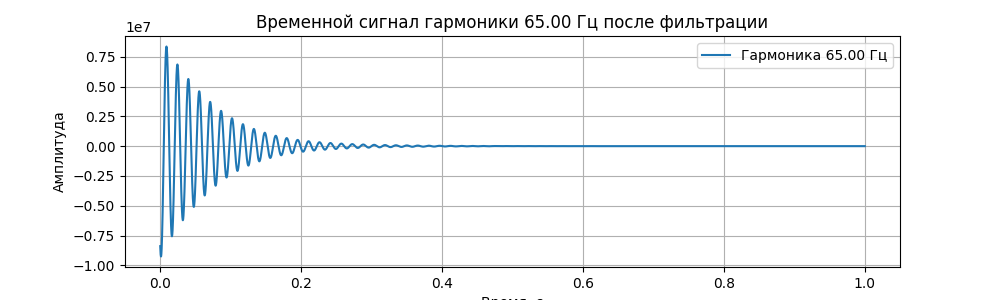

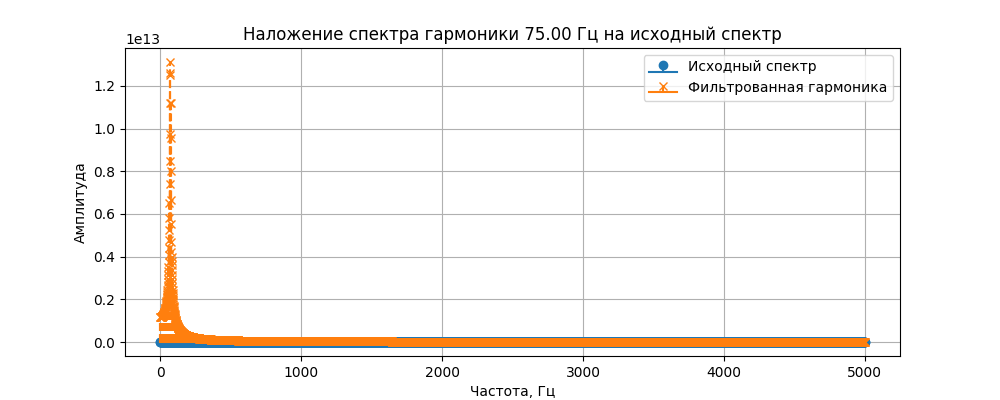

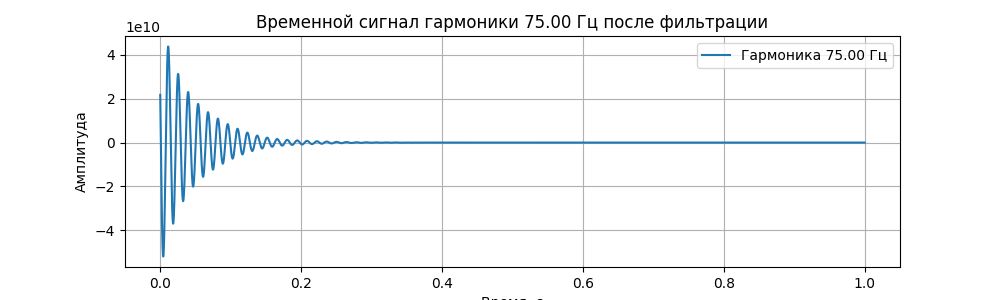

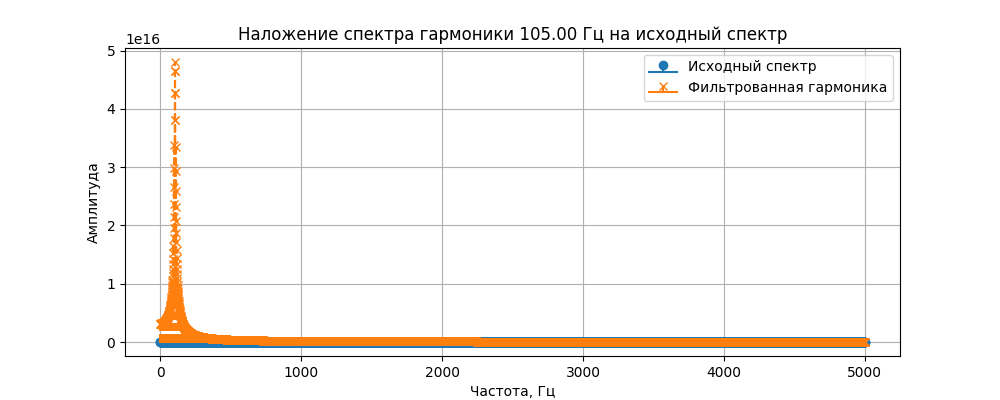

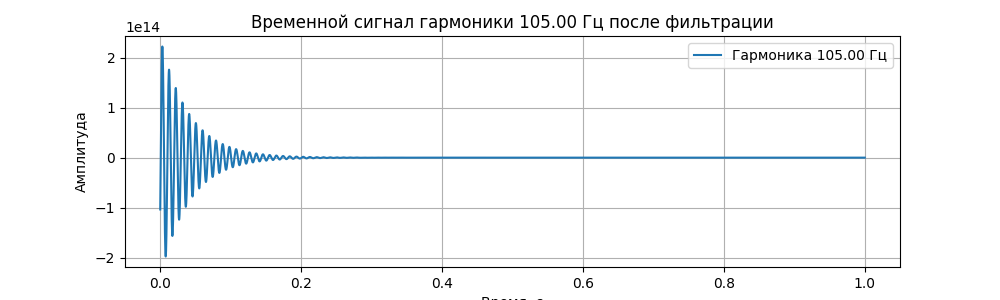

/tmp/ipykernel_194175/2539535462.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,4))


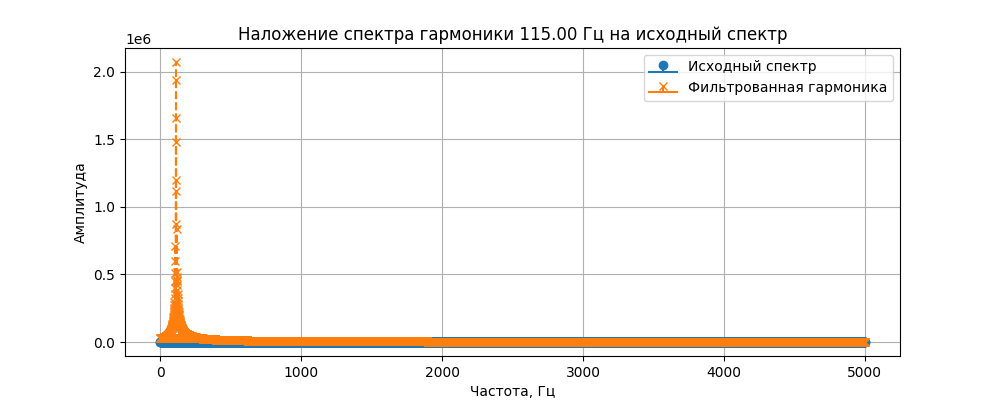

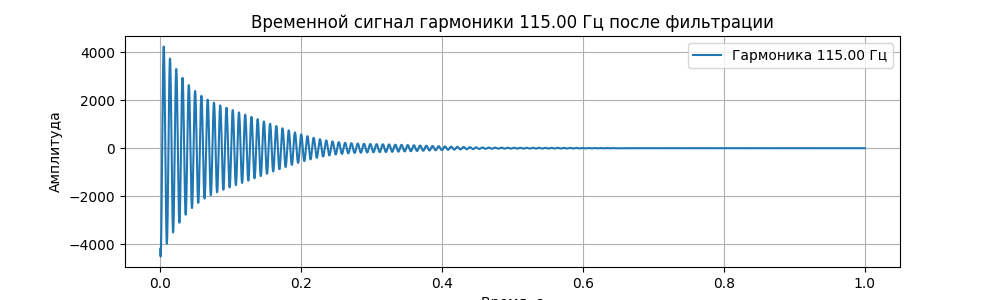

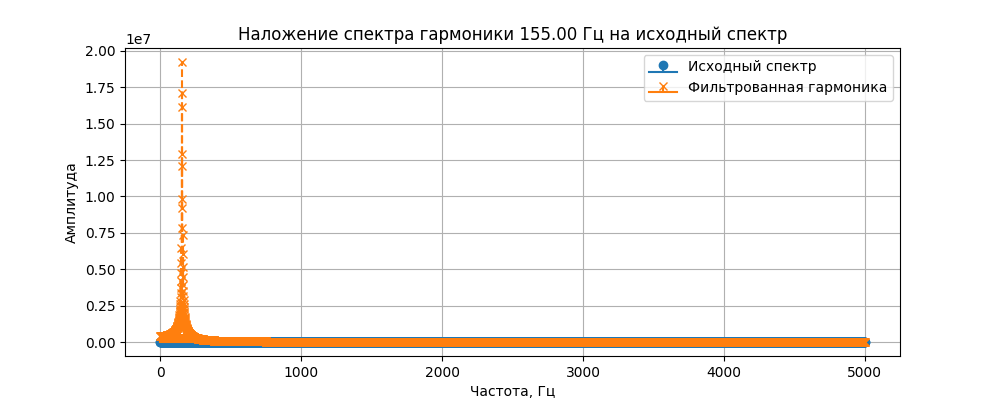

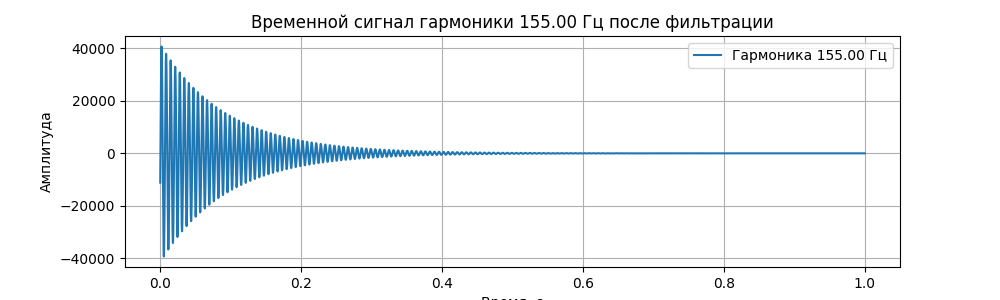

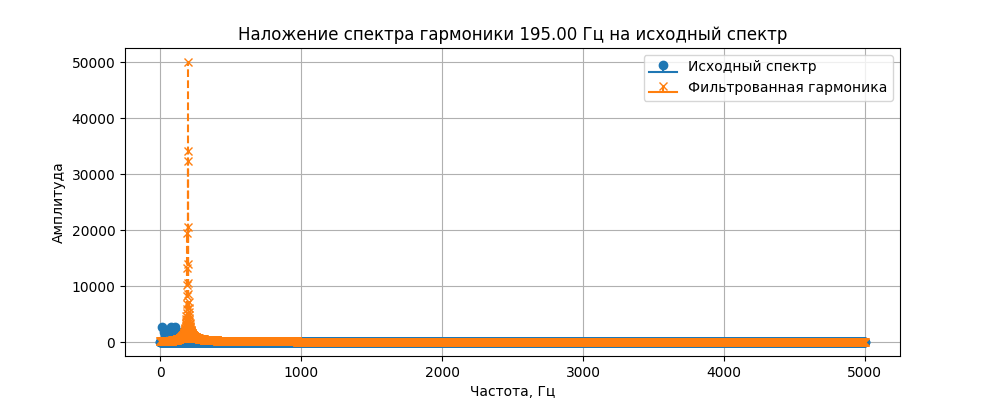

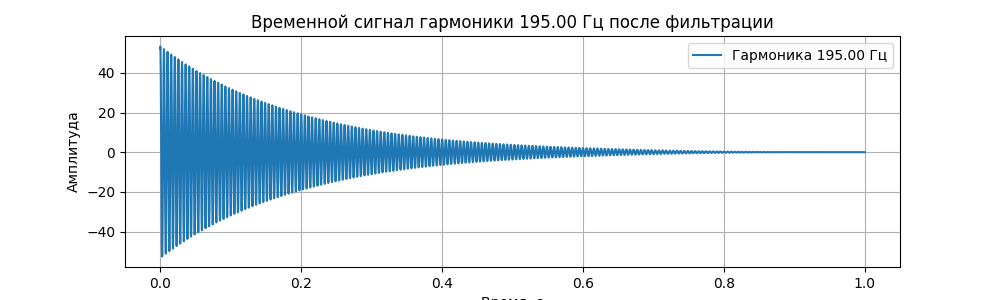

In [5]:
filtered_signals = []

for pf in peak_freqs:
    bandwidth = 1
    low = (pf - bandwidth) / (fs / 2)
    high = (pf + bandwidth) / (fs / 2)
    b, a = butter(N=4, Wn=[low, high], btype='bandpass')
    
    filtered_signal = filtfilt(b, a, S)
    filtered_signals.append(filtered_signal)
    
    F_fft = np.fft.fft(filtered_signal)
    
    plt.figure(figsize=(10,4))
    plt.stem(freqs[:N//2], np.abs(S_fft)[:N//2], linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Исходный спектр')
    plt.stem(freqs[:N//2], np.abs(F_fft)[:N//2], linefmt='C1--', markerfmt='C1x', basefmt='C1-', label='Фильтрованная гармоника')
    plt.title(f"Наложение спектра гармоники {pf:.2f} Гц на исходный спектр")
    plt.xlabel("Частота, Гц")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10,3))
    plt.plot(t, filtered_signal, label=f'Гармоника {pf:.2f} Гц')
    plt.title(f"Временной сигнал гармоники {pf:.2f} Гц после фильтрации")
    plt.xlabel("Время, с")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.legend()
    plt.show()


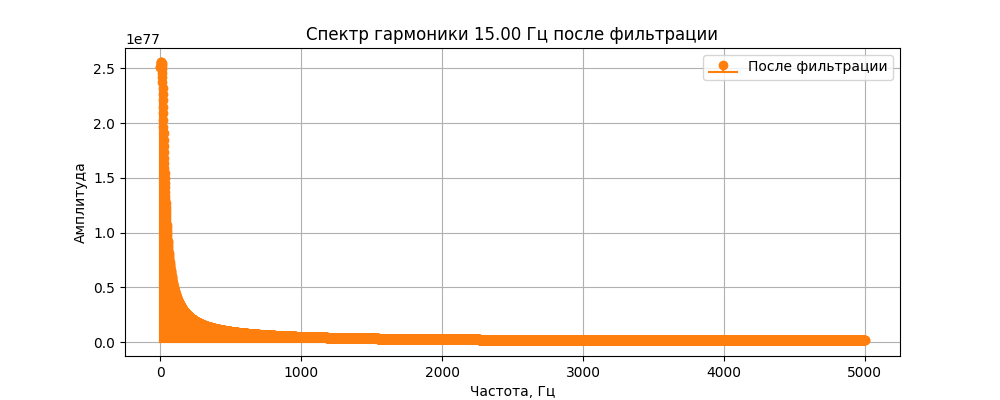

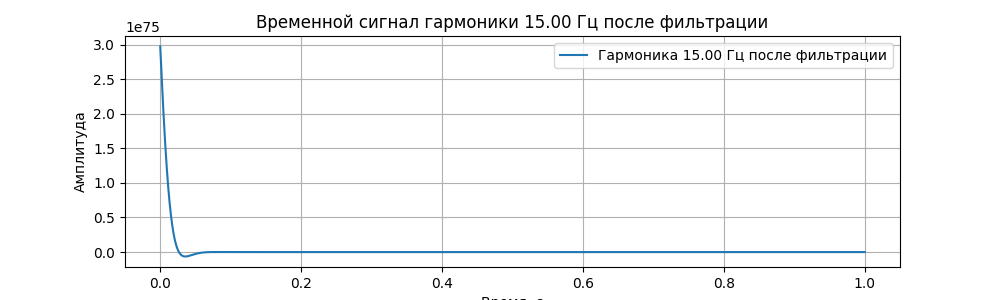

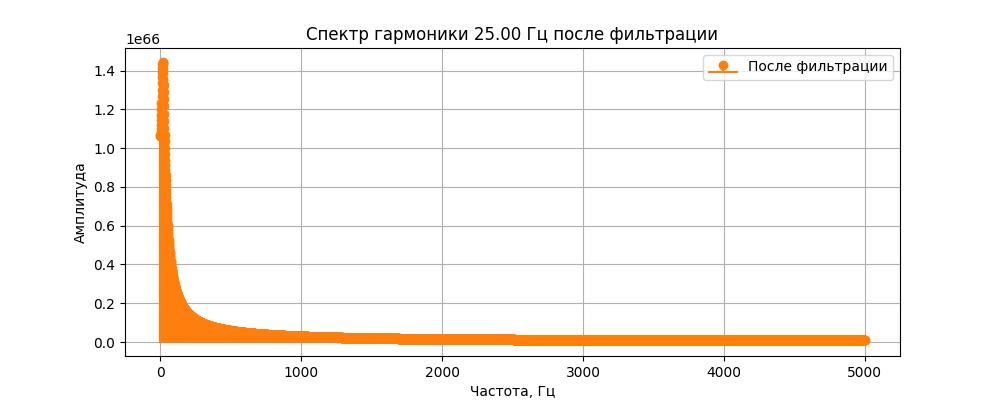

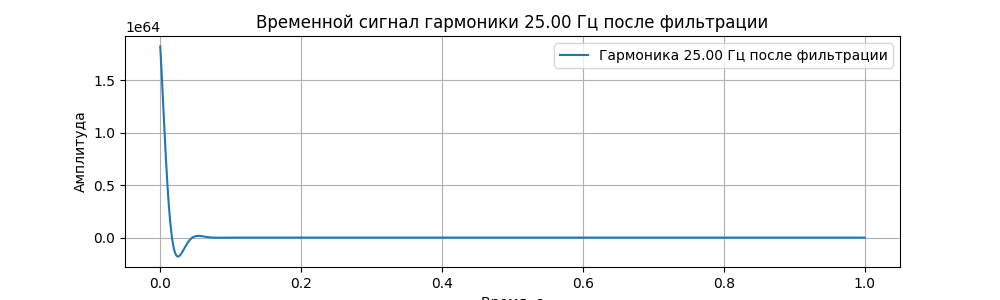

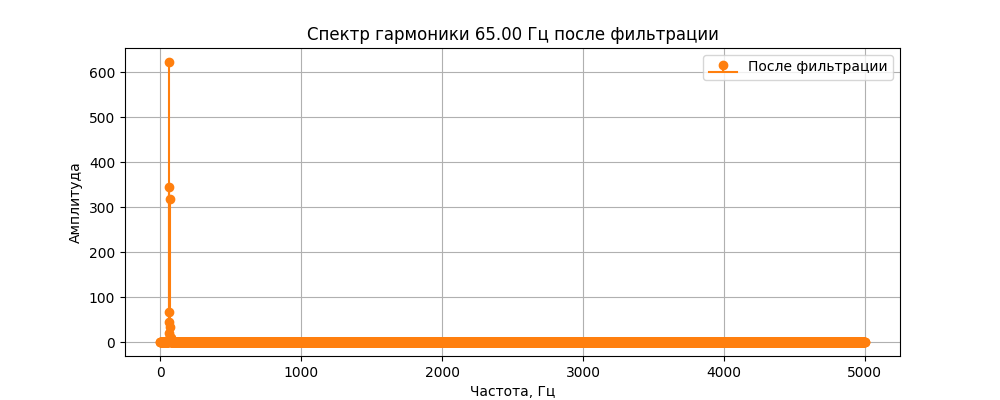

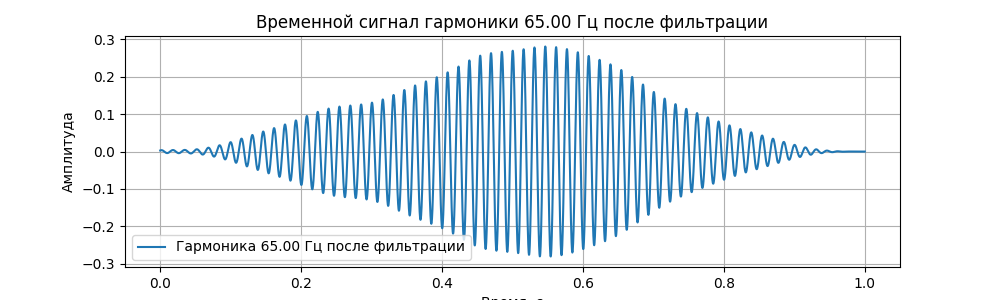

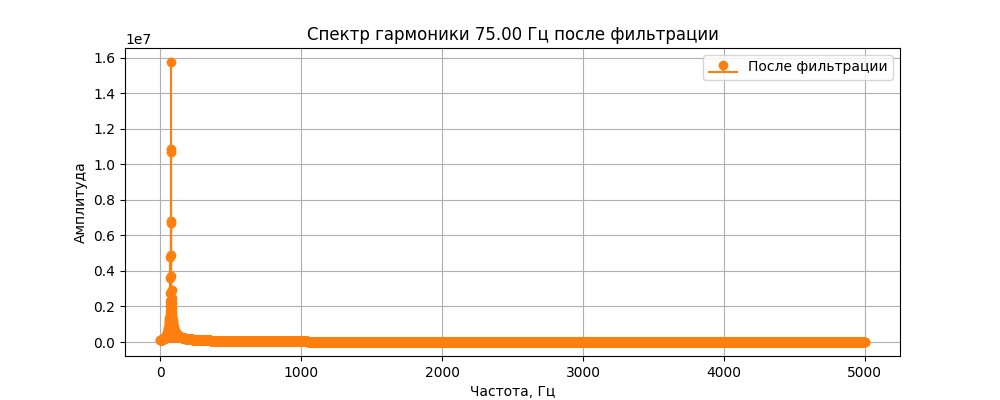

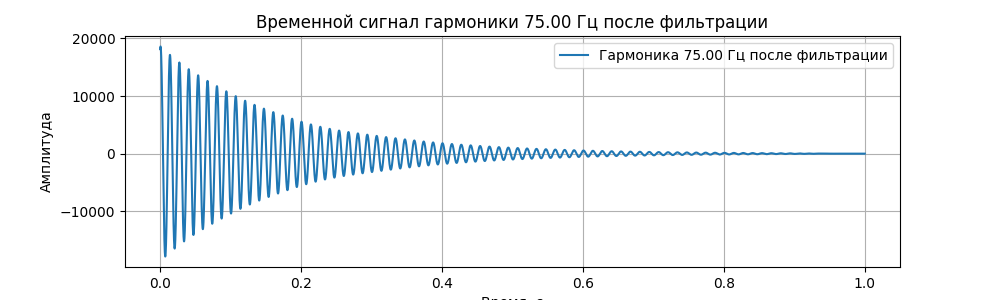

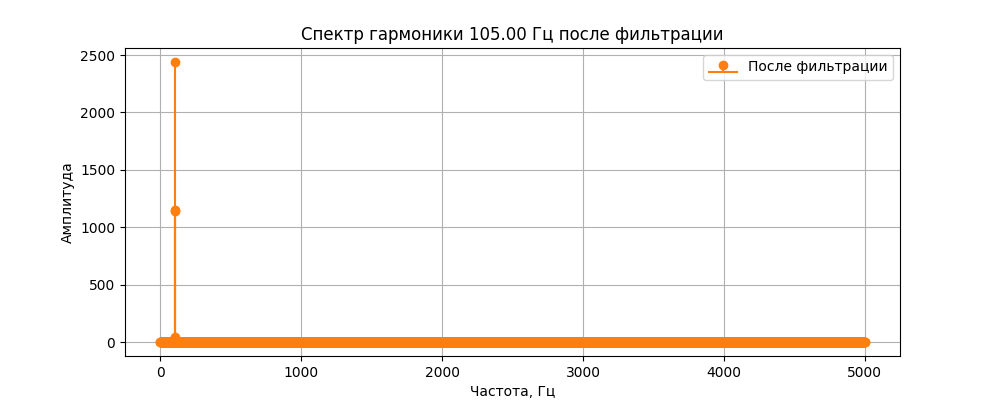

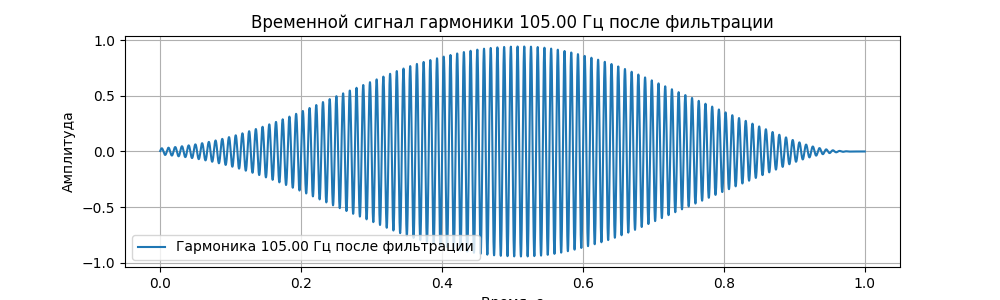

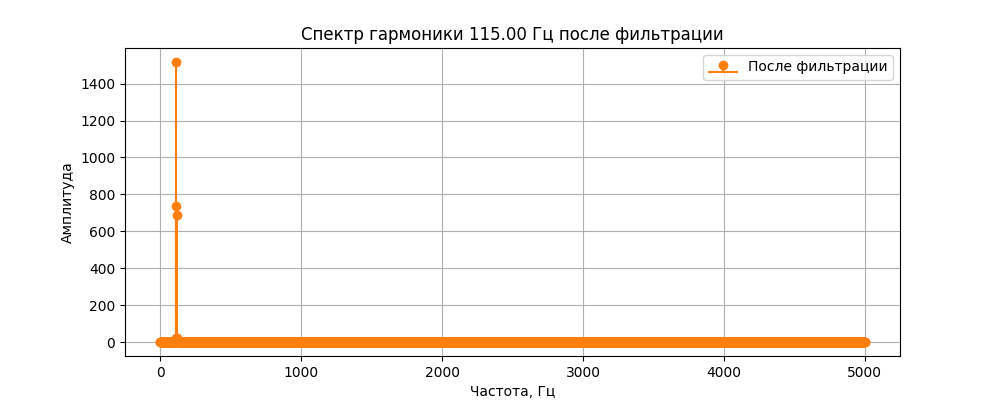

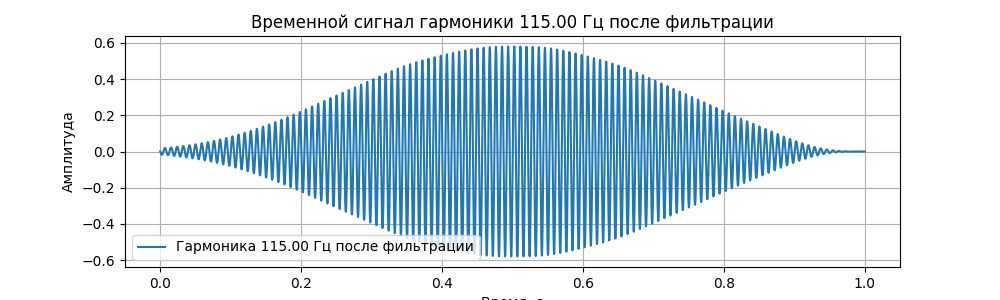

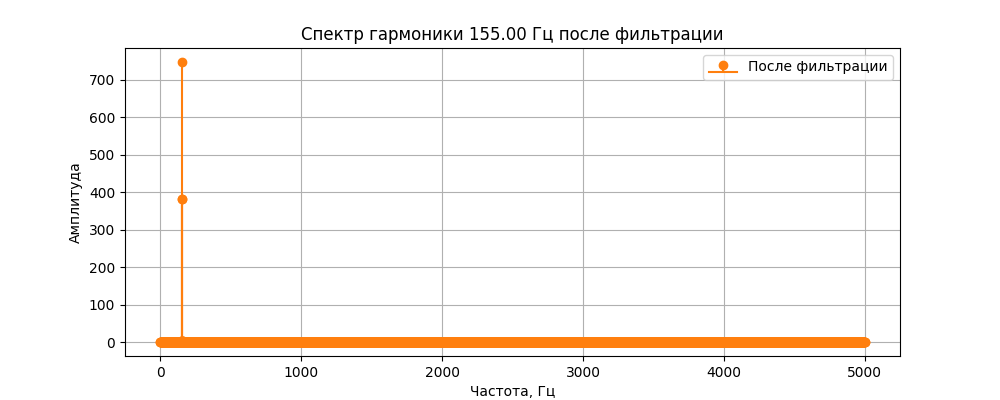

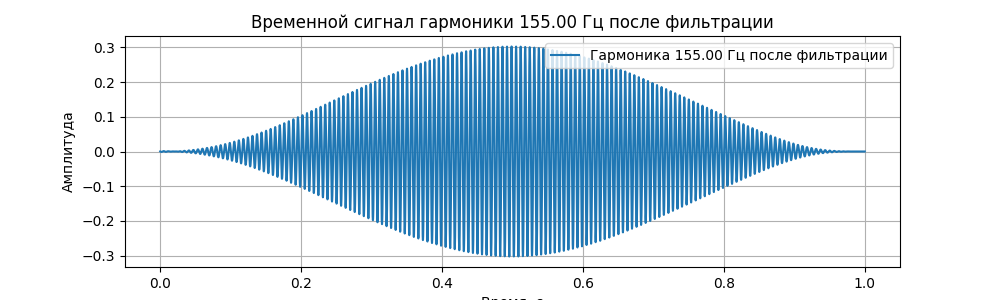

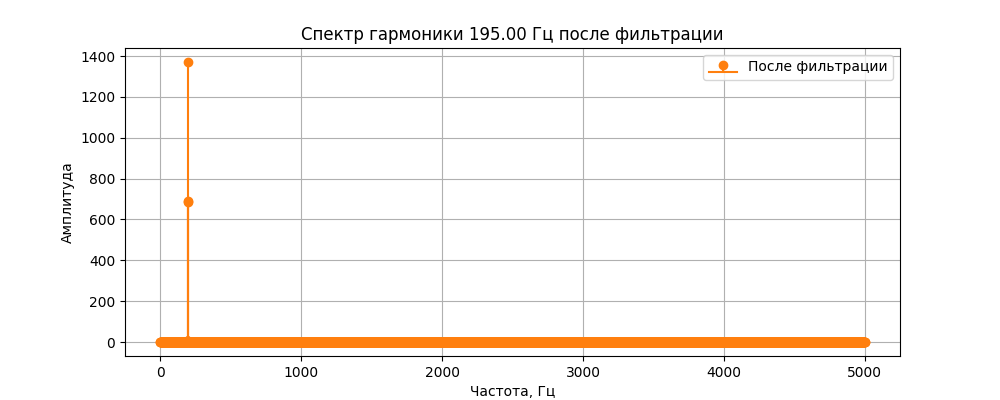

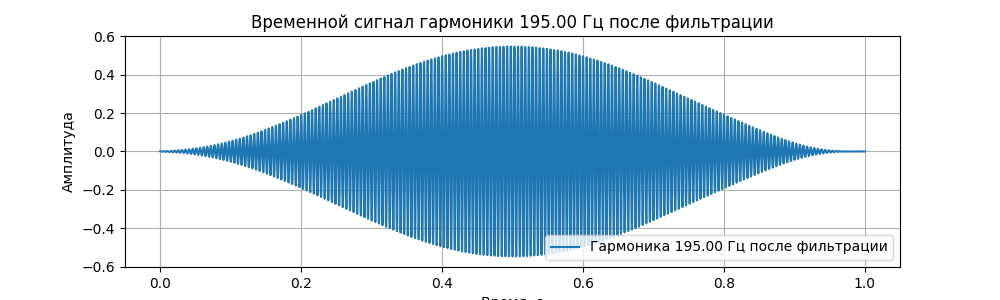

In [6]:
from scipy.signal import butter, filtfilt

filtered_signals = []

bandwidth = 5
window = np.hanning(len(S))
S_windowed = S * window

for pf in peak_freqs:
    low = (pf - bandwidth) / (fs / 2)
    high = (pf + bandwidth) / (fs / 2)
    b, a = butter(N=4, Wn=[low, high], btype='bandpass')
    
    sig_filtered = filtfilt(b, a, S_windowed)
    filtered_signals.append(sig_filtered)
    
    F_fft = np.fft.fft(sig_filtered)
    plt.figure(figsize=(10,4))
    plt.stem(freqs[:N//2], np.abs(F_fft)[:N//2], linefmt='C1-', markerfmt='C1o', basefmt='C1-', label='После фильтрации')
    plt.title(f"Спектр гармоники {pf:.2f} Гц после фильтрации")
    plt.xlabel("Частота, Гц")
    plt.ylabel("Амплитуда")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10,3))
    plt.plot(t, sig_filtered, label=f'Гармоника {pf:.2f} Гц после фильтрации')
    plt.title(f"Временной сигнал гармоники {pf:.2f} Гц после фильтрации")
    plt.xlabel("Время, с")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.legend()
    plt.show()


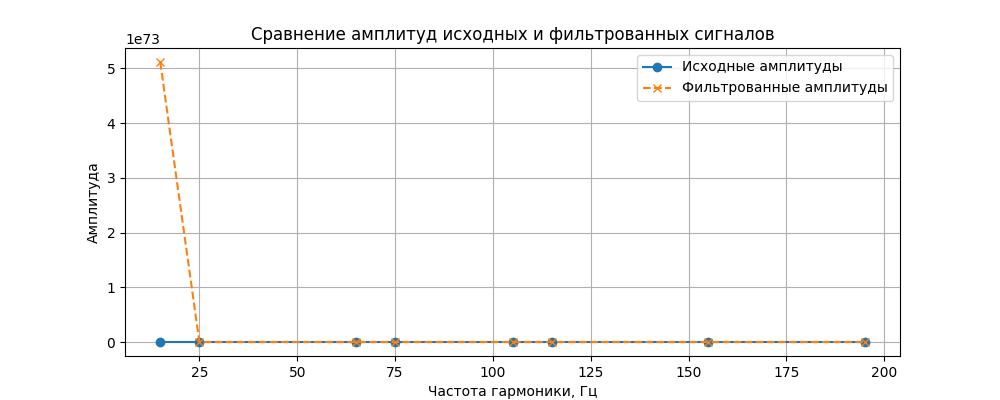

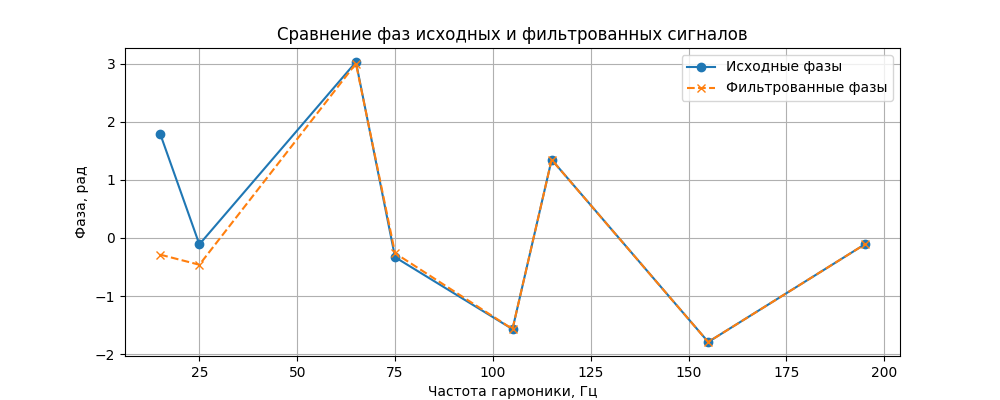

In [7]:
def extract_fft_params(signal, fs):
    N = len(signal)
    F_fft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    
    pos_mask = freqs >= 0
    F_fft_pos = F_fft[pos_mask]
    freqs_pos = freqs[pos_mask]
    
    idx_peak = np.argmax(np.abs(F_fft_pos))
    amplitude = np.abs(F_fft_pos[idx_peak]) * 2 / N
    frequency = freqs_pos[idx_peak]
    phase = np.angle(F_fft_pos[idx_peak])
    
    return amplitude, frequency, phase

amplitudes_filtered = []
frequencies_filtered = []
phases_filtered = []

for sig_filtered in filtered_signals:
    amp, freq, phase = extract_fft_params(sig_filtered, fs)
    amplitudes_filtered.append(amp)
    frequencies_filtered.append(freq)
    phases_filtered.append(phase)

amplitudes_original = []
frequencies_original = []
phases_original = []

for sig in harmonics:
    amp, freq, phase = extract_fft_params(sig, fs)
    amplitudes_original.append(amp)
    frequencies_original.append(freq)
    phases_original.append(phase)

plt.figure(figsize=(10,4))
plt.plot(peak_freqs, amplitudes_original, 'o-', label='Исходные амплитуды', color='C0')
plt.plot(peak_freqs, amplitudes_filtered, 'x--', label='Фильтрованные амплитуды', color='C1')
plt.xlabel("Частота гармоники, Гц")
plt.ylabel("Амплитуда")
plt.title("Сравнение амплитуд исходных и фильтрованных сигналов")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(peak_freqs, phases_original, 'o-', label='Исходные фазы', color='C0')
plt.plot(peak_freqs, phases_filtered, 'x--', label='Фильтрованные фазы', color='C1')
plt.xlabel("Частота гармоники, Гц")
plt.ylabel("Фаза, рад")
plt.title("Сравнение фаз исходных и фильтрованных сигналов")
plt.grid(True)
plt.legend()
plt.show()


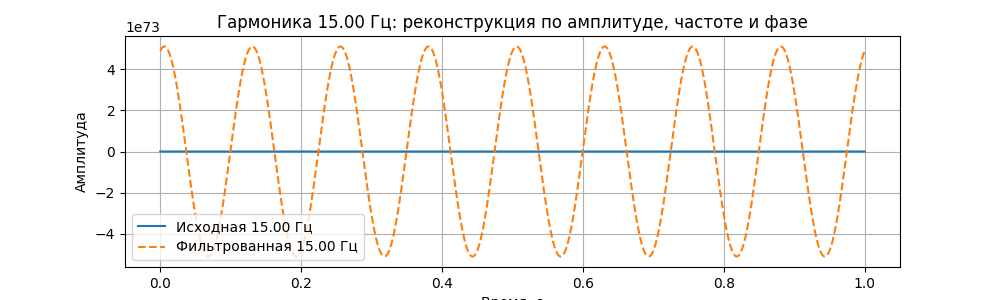

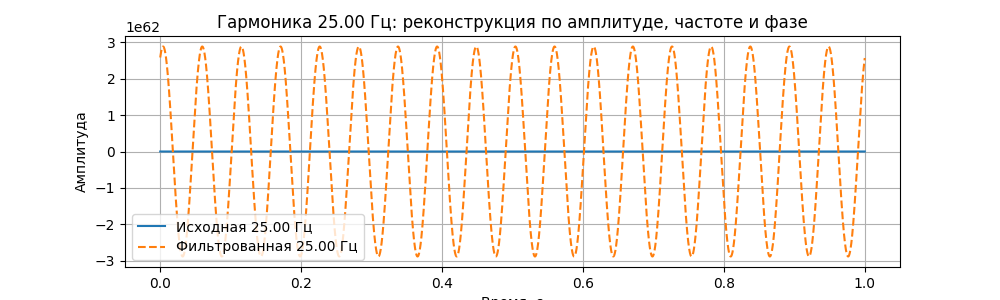

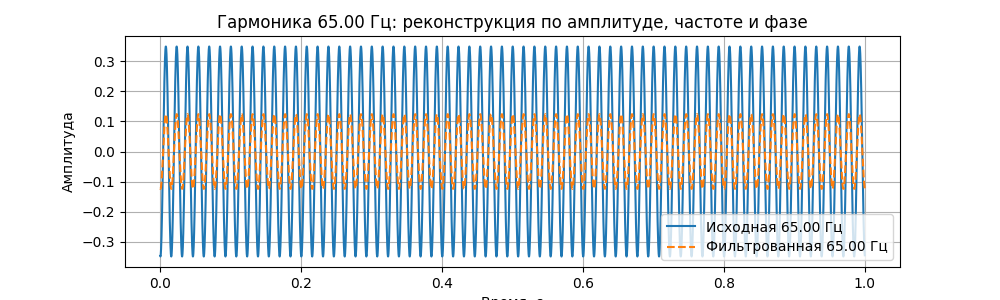

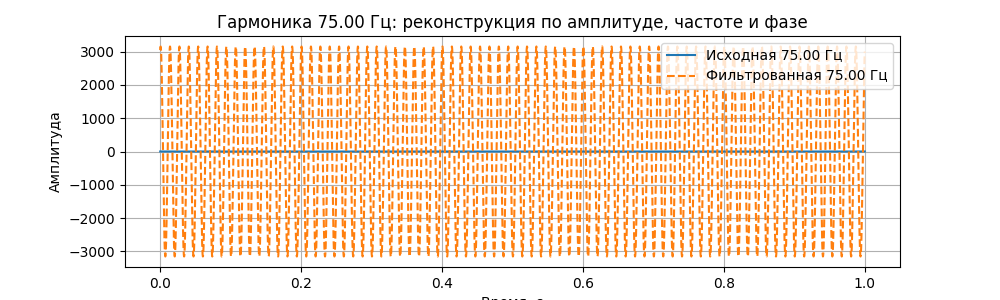

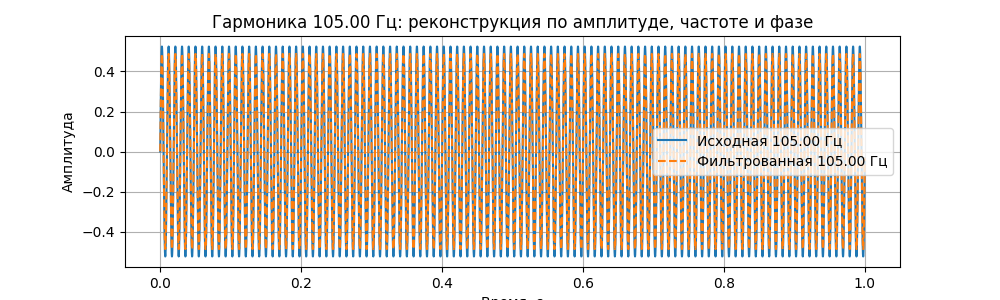

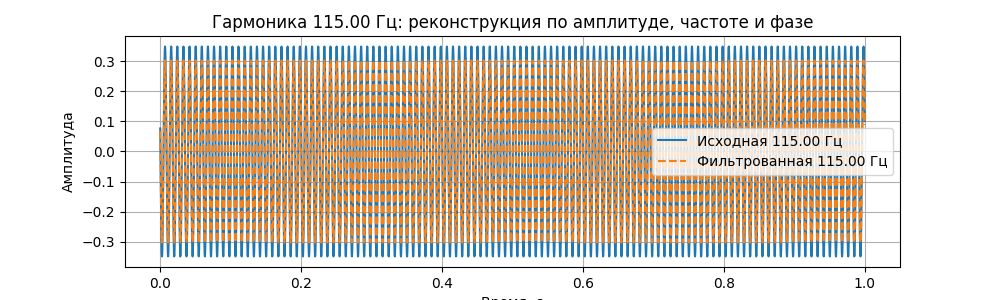

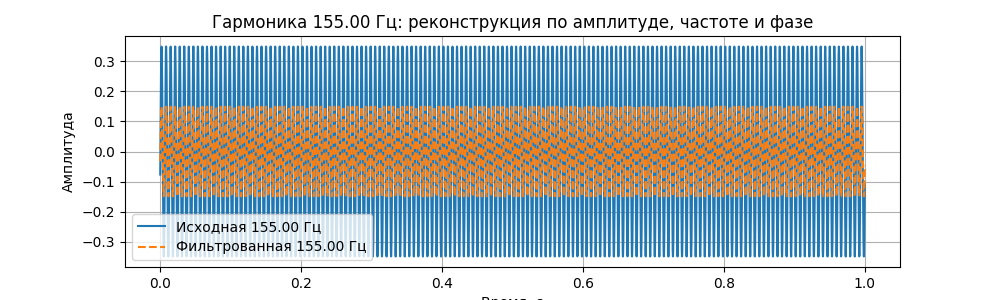

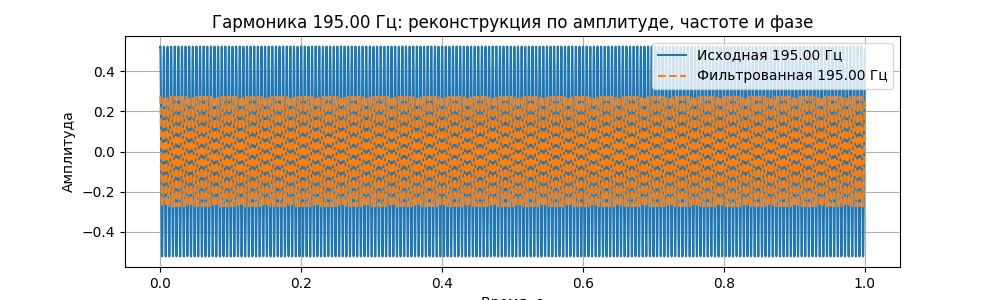

In [8]:
reconstructed_original = []
reconstructed_filtered = []

for amp, freq, phase in zip(amplitudes_original, frequencies_original, phases_original):
    sig = amp * np.cos(2 * np.pi * freq * t + phase)
    reconstructed_original.append(sig)

for amp, freq, phase in zip(amplitudes_filtered, frequencies_filtered, phases_filtered):
    sig = amp * np.cos(2 * np.pi * freq * t + phase)
    reconstructed_filtered.append(sig)

for i, pf in enumerate(peak_freqs[:len(reconstructed_original)]):
    plt.figure(figsize=(10,3))
    plt.plot(t, reconstructed_original[i], label=f'Исходная {pf:.2f} Гц', linestyle='-')
    plt.plot(t, reconstructed_filtered[i], label=f'Фильтрованная {pf:.2f} Гц', linestyle='--')
    plt.xlabel("Время, с")
    plt.ylabel("Амплитуда")
    plt.title(f"Гармоника {pf:.2f} Гц: реконструкция по амплитуде, частоте и фазе")
    plt.grid(True)
    plt.legend()
    plt.show()
